In [127]:
import pandas as pd
import numpy as np
from __future__ import division
import calendar
import time
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from dateutil.parser import parse
from pandas.tslib import Timestamp
colorz=sns.color_palette("husl", 8)
#sns.palplot(sns.color_palette("husl", 8))

In [106]:
sens1=pd.read_excel('/Users/stella/Desktop/arlene-jul7-v1.xls')#[1:417].reset_index()
sens2=pd.read_excel('/Users/stella/Desktop/arlene-jul7-v2.xls')#[1:417].reset_index()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [107]:
del sens1['Record'], sens2['Record'], sens1['DP(℃)'], sens2['DP(℃)']

In [108]:
sens1.head()

,Time,Temp(℃),Humi(%RH),CO2(PPM)
0,07-07-17 13:59:02,26.7,69.5,531
1,07-07-17 14:00:02,26.3,70.4,434
2,07-07-17 14:01:02,26.3,68.9,419
3,07-07-17 14:02:02,26.5,69.7,416
4,07-07-17 14:03:02,26.6,70.4,416


In [109]:
sens1=sens1.rename(columns={'Time':'Time-1',
                          'Temp(℃)':'Temp(℃)-1',
                          'Humi(%RH)':'Humi(%RH)-1',
                          'CO2(PPM)':'CO2(PPM)-1'})

sens2=sens2.rename(columns={'Time':'Time-2',
                          'Temp(℃)':'Temp(℃)-2',
                          'Humi(%RH)':'Humi(%RH)-2',
                          'CO2(PPM)':'CO2(PPM)-2'})

In [110]:
del sens2['Time-2']

In [111]:
df=pd.concat([sens1,sens2],axis=1)

In [112]:
df['Time-1']=df['Time-1'].apply(lambda x: parse(x))

In [113]:
df['tempF-1']=df['Temp(℃)-1']*(9/5)+32
df['tempF-2']=df['Temp(℃)-2']*(9/5)+32
df['time']=df['Time-1'].apply(lambda x: datetime.time(x.hour,x.minute))

In [117]:
df['Time-1'][0]

Timestamp('2017-07-07 13:59:02')

In [118]:
aqi=pd.read_excel('/Users/stella/Downloads/realeco_all-three-aq-indoors_2017-07-04t161916_2017-07-11t161916.xlsx')

In [119]:
aqi=aqi[(aqi['time']>datetime.date(2017,7,7)) & (aqi['time']<datetime.date(2017,7,8))].reset_index()

In [120]:
del aqi['index']

In [121]:
aqi['time2']=aqi['time'].apply(lambda x: datetime.time(x.hour,x.minute))

In [122]:
aqi=aqi[(aqi['time2']>=df['time'][0]) &(aqi['time2']<=df['time'][len(df)-1])].reset_index()

In [123]:
del aqi['index']

In [124]:
aqi['tempF']=aqi['value (°C)']*(9/5)+32

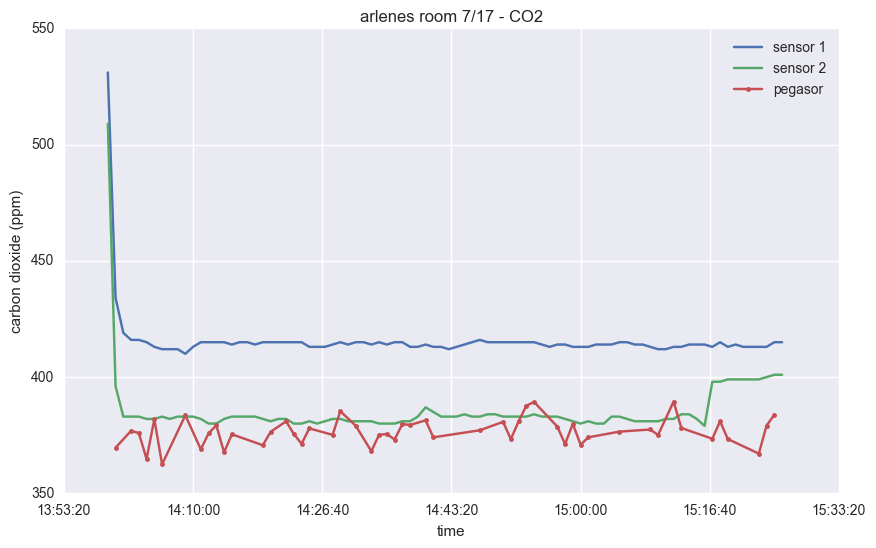

In [136]:
plt.figure(figsize=(10,6))
plt.plot(df['time'],df['CO2(PPM)-1'],label='sensor 1')
plt.plot(df['time'],df['CO2(PPM)-2'],label='sensor 2')
plt.plot(aqi['time2'],aqi['co2 (ppm)'],'.-',label='pegasor')
plt.ylim([350,550])
plt.title('arlenes room 7/17 - CO2')
plt.xlabel('time')
plt.ylabel('carbon dioxide (ppm)')
plt.legend()

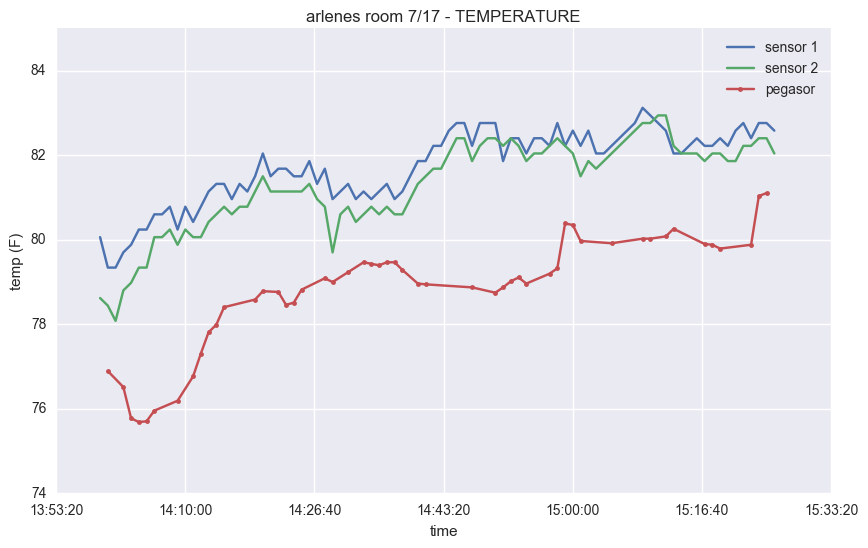

In [141]:
plt.figure(figsize=(10,6))
plt.plot(df['time'],df['tempF-1'],label='sensor 1')
plt.plot(df['time'],df['tempF-2'],label='sensor 2')
plt.plot(aqi['time2'],aqi['tempF'],'.-',label='pegasor')
plt.ylim([74,85])
plt.title('arlenes room 7/17 - TEMPERATURE')
plt.xlabel('time')
plt.ylabel('temp (F)')
plt.legend()

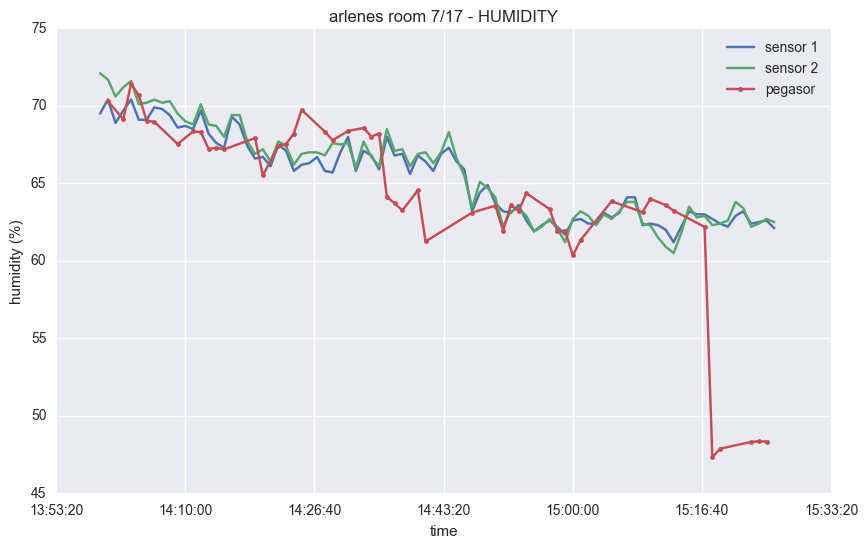

In [140]:
plt.figure(figsize=(10,6))
plt.plot(df['time'],df['Humi(%RH)-1'],label='sensor 1')
plt.plot(df['time'],df['Humi(%RH)-2'],label='sensor 2')
plt.plot(aqi['time2'],aqi['relh (%)'],'.-',label='pegasor')
plt.title('arlenes room 7/17 - HUMIDITY')
plt.xlabel('time')
plt.ylabel('humidity (%)')
plt.legend()